In [1]:
%pylab inline
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
import torch.optim as optim

from torch.utils.data import TensorDataset
from torch.autograd import Variable
from torchvision import transforms
from torchvision.datasets import MNIST

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = MNIST('./data', train=True, download=True, transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )

test = MNIST('./data', train=False, download=True, transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )

In [3]:
train_data = train.train_data
print(type(train_data))
train_data = train.transform(train_data.numpy())
print(type(train_data))

print(train_data.shape)

<class 'torch.ByteTensor'>
<class 'torch.FloatTensor'>
torch.Size([28, 60000, 28])


In [4]:

train_data = train.train_data
train_data = train.transform(train_data.numpy())

print(' -> Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' -> Tensor Shape:', train.train_data.size())
print(' -> Transformed Shape:', train_data.size())

 -> Numpy Shape: (60000, 28, 28)
 -> Tensor Shape: torch.Size([60000, 28, 28])
 -> Transformed Shape: torch.Size([28, 60000, 28])


In [5]:
# Designing Neural Network (Linear with Backpropogation)

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        # Linear Layer
        
        self.fc1 = nn.Linear(784, 548)
        self.bc1 = nn.BatchNorm1d(548)
        
        self.fc2 = nn.Linear(548, 252)
        self.bc2 = nn.BatchNorm1d(252)
        
        self.fc3 = nn.Linear(252, 10)
        
        
    def forward(self, x):
        x = x.view((-1, 784))
        
        # Calling Initial Layers 
        h = self.fc1(x)
        h = self.bc1(h)
        
        # Defining Activation Function
        h = F.relu(h)
        h = F.dropout(h, p=0.5, training=self.training)
        
        # Calling Second Layers 
        
        h = self.fc2(h)
        h = self.bc2(h)
        
        # Second Layer Activation Function
        
        h = F.relu(h)
        h = F.dropout(h, p=0.2, training=self.training)
        
        h = self.fc3(h)
        out = F.log_softmax(h, dim = 1)
        return out

# Creating a model.
model = Model()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
# Model Architecture
print(model)

# Adam Optimizer
print(optimizer)

Model(
  (fc1): Linear(in_features=784, out_features=548, bias=True)
  (bc1): BatchNorm1d(548, eps=1e-05, momentum=0.1, affine=True)
  (fc2): Linear(in_features=548, out_features=252, bias=True)
  (bc2): BatchNorm1d(252, eps=1e-05, momentum=0.1, affine=True)
  (fc3): Linear(in_features=252, out_features=10, bias=True)
)


In [7]:
model.train()

Model(
  (fc1): Linear(in_features=784, out_features=548, bias=True)
  (bc1): BatchNorm1d(548, eps=1e-05, momentum=0.1, affine=True)
  (fc2): Linear(in_features=548, out_features=252, bias=True)
  (bc2): BatchNorm1d(252, eps=1e-05, momentum=0.1, affine=True)
  (fc3): Linear(in_features=252, out_features=10, bias=True)
)

In [8]:
dataloader_args = dict(shuffle=True, batch_size=64,num_workers=1, pin_memory=True)
train_loader = dataloader.DataLoader(train, **dataloader_args)
test_loader = dataloader.DataLoader(test, **dataloader_args)

In [9]:
losses = []
for epoch in range(15):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Get Samples
        data, target = Variable(data), Variable(target)
        
        # Init
        optimizer.zero_grad()

        # Predict
        y_pred = model(data) 

        # Calculate loss
        loss = F.cross_entropy(y_pred, target)
        losses.append(loss.data[0])
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        
        # Display
        if batch_idx % 100 == 1:
            print('\r Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, 
                batch_idx * len(data), 
                len(train_loader.dataset),
                100. * batch_idx / len(train_loader), 
                loss.data[0]), 
                end='')
            
    print()

 Train Epoch: 0 [57664/60000 (96%)]	Loss: 0.130172
 Train Epoch: 1 [57664/60000 (96%)]	Loss: 0.104852
 Train Epoch: 2 [57664/60000 (96%)]	Loss: 0.082561
 Train Epoch: 3 [57664/60000 (96%)]	Loss: 0.062892
 Train Epoch: 4 [57664/60000 (96%)]	Loss: 0.035460
 Train Epoch: 5 [57664/60000 (96%)]	Loss: 0.148804
 Train Epoch: 6 [57664/60000 (96%)]	Loss: 0.106285
 Train Epoch: 7 [57664/60000 (96%)]	Loss: 0.037631
 Train Epoch: 8 [57664/60000 (96%)]	Loss: 0.014853
 Train Epoch: 9 [57664/60000 (96%)]	Loss: 0.026930
 Train Epoch: 10 [57664/60000 (96%)]	Loss: 0.024156
 Train Epoch: 11 [57664/60000 (96%)]	Loss: 0.082430
 Train Epoch: 12 [57664/60000 (96%)]	Loss: 0.078530
 Train Epoch: 13 [57664/60000 (96%)]	Loss: 0.056874
 Train Epoch: 14 [57664/60000 (96%)]	Loss: 0.047483


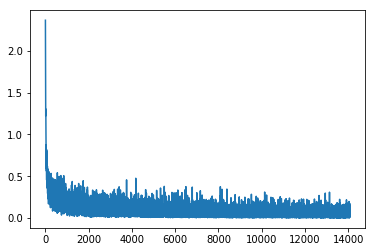

In [10]:
plot(losses)

In [11]:
evaluate_x = Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
evaluate_y = Variable(test_loader.dataset.test_labels)


output = model(evaluate_x)
pred = output.data.max(1)[1]
d = pred.eq(evaluate_y.data).cpu()
accuracy = d.sum()/d.size()[0]

print('Accuracy:', accuracy)

Accuracy: 0.9766


In [12]:
# Outputs in Numbers for testdataset.

print(pred)


 7
 2
 1
⋮ 
 4
 5
 6
[torch.LongTensor of size 10000]



torch.Size([10000, 28, 28])
<class 'torch.autograd.variable.Variable'>
<class 'numpy.ndarray'>


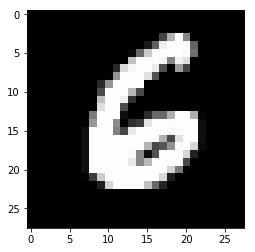

In [13]:
print(evaluate_x.shape)
img = evaluate_x[131]
print(type(img))
img = img.data.cpu().numpy()
print(type(img))
plt.imshow((img).reshape(28,28), cmap=cm.gray)